In [10]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
model = tf.keras.models.load_model('/root/kickboard_helmet_project/SERVER/train_model/mobilenetv2/model_save/mobilenetv21126.h5')

In [12]:
test_data = np.load('/root/kickboard_helmet_project/SERVER/train_model/mobilenetv2/test_data.npy')
test_label = np.load('/root/kickboard_helmet_project/SERVER/train_model/mobilenetv2/test_label.npy')

In [13]:
model.evaluate(test_data, test_label)

536/536 [==============================] - 50s 91ms/step - loss: 0.3907 - acc: 0.8374


[0.3906511962413788, 0.8373599648475647]

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

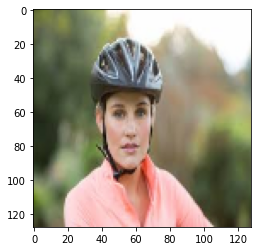

In [15]:
img = cv2.imread('/root/kickboard_helmet_project/SERVER/train_model/mobilenetv2/test_img/images.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (128,128))
plt.imshow(img)

In [16]:
import sys
sys.path.append('/root/kickboard_helmet_project/SERVER/train_model/RetinaFace-tf2')

In [17]:
from src.retinafacetf2.retinaface import RetinaFace
detector = RetinaFace(False, 0.4)
file_name = 'images'
img = cv2.imread(f'/root/kickboard_helmet_project/SERVER/train_model/mobilenetv2/test_img/{file_name}.jpg', cv2.IMREAD_COLOR)

faces, landmarks = detector.detect(img, 0.8)
print(faces.shape)
for idx in range(faces.shape[0]):
    x ,y , xw, yh = faces[idx][:4]
    x ,y , xw, yh = faces[idx][:4]
    w = xw - x
    h = yh - y
    x_min = max(0, int(x - 0.5 * w))
    y_min = max(0, int(y - 0.6 * h))
    x_max = min(img.shape[1], int(x + 1.5 * w))
    y_max = min(img.shape[0], int(y + 1.3 * h))

    face_img = img[y_min:y_max, x_min:x_max]
    cv2.imwrite(f'/root/kickboard_helmet_project/SERVER/train_model/mobilenetv2/test_img/cut_{file_name}_{idx}.jpg', face_img)

for i in range(faces.shape[0]):
    img = cv2.imread(f'/root/kickboard_helmet_project/SERVER/train_model/mobilenetv2/test_img/cut_{file_name}_{i}.jpg', cv2.IMREAD_COLOR)
    img = cv2.resize(img, (128,128))
    img = np.reshape(img, (-1,128,128,3))
    predict = tf.nn.softmax(model.predict(img))
    classes = tf.cast(tf.argmax(predict, 1), tf.uint8)
    if 0 == classes.numpy():
        print('헬멧 안씀')
    else:
        print('헬멧 씀')

found weights located at /root/.cache/retinaface/retinafaceweights.npy
(1, 5)
헬멧 씀


In [20]:
from src.retinafacetf2.retinaface import RetinaFace
detector = RetinaFace(False, 0.4)
file_name = 'test3'
img = cv2.imread(f'/root/kickboard_helmet_project/SERVER/train_model/mobilenetv2/test_img/{file_name}.jpg', cv2.IMREAD_COLOR)

faces, landmarks = detector.detect(img, 0.8)
print(faces.shape)
for idx in range(faces.shape[0]):
    x ,y , xw, yh = faces[idx][:4]
    x ,y , xw, yh = faces[idx][:4]
    w = xw - x
    h = yh - y
    x_min = max(0, int(x - 0.5 * w))
    y_min = max(0, int(y - 0.6 * h))
    x_max = min(img.shape[1], int(x + 1.5 * w))
    y_max = min(img.shape[0], int(y + 1.3 * h))

    face_img = img[y_min:y_max, x_min:x_max]
    cv2.imwrite(f'/root/kickboard_helmet_project/SERVER/train_model/mobilenetv2/test_img/cut_{file_name}_{idx}.jpg', face_img)

for i in range(faces.shape[0]):
    img = cv2.imread(f'/root/kickboard_helmet_project/SERVER/train_model/mobilenetv2/test_img/cut_{file_name}_{i}.jpg', cv2.IMREAD_COLOR)
    img = cv2.resize(img, (128,128))
    img = np.reshape(img, (-1,128,128,3))
    predict = tf.nn.softmax(model.predict(img))
    classes = tf.cast(tf.argmax(predict, 1), tf.uint8)
    if 0 == classes.numpy():
        print('헬멧 안씀')
    else:
        print('헬멧 씀')

found weights located at /root/.cache/retinaface/retinafaceweights.npy
(1, 5)
헬멧 안씀
